## Session 14 (pandas part 4)

### Hierarchical Indexing (Multi-Index)

In [29]:
import pandas as pd
import numpy as np

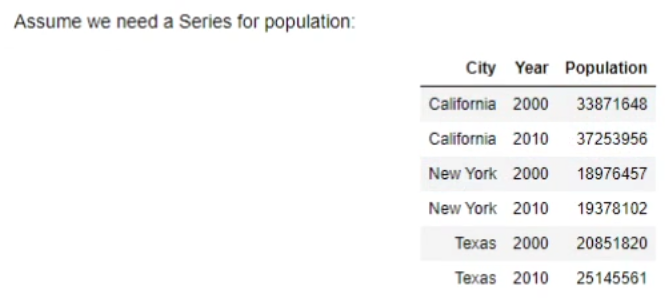

In [3]:
p = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
idx = [('California', 2000), ('California', 2010), ('New York', 2000),
       ('New York', 2010), ('Texas', 2000), ('Texas', 2010),]
ds = pd.Series(p, index=idx)
ds

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [4]:
ds[('California', 2010)]

37253956

In [5]:
ds[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [6]:
# upuntil now we use regular indexing and for example for this particular dataframe,
# we can not easily get population of all cities for year 2000.

In [7]:
# using multi-index for the same example :

In [8]:
p = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
idx = [('California', 2000), ('California', 2010), ('New York', 2000),
       ('New York', 2010), ('Texas', 2000), ('Texas', 2010),]
midx = pd.MultiIndex.from_tuples(idx)
ds = pd.Series(p, index=midx)
ds

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [9]:
ds['California', 2010]

37253956

In [10]:
ds['California']

2000    33871648
2010    37253956
dtype: int64

In [11]:
ds[:, 2000]

California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [14]:
# we can also convert this series to the equivalent dataframe
df = ds.unstack()
df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [15]:
# the reverse conversion is also available
ds = df.stack()
ds

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

### creating multi-index objects

In [16]:
midx = pd.MultiIndex.from_tuples([('California', 2000), ('California', 2010), ('New York', 2000),
       ('New York', 2010), ('Texas', 2000), ('Texas', 2010),])
midx

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [17]:
midx2 = pd.MultiIndex.from_product([['California', 'New York', 'Texas'], [2000, 2010]])
midx2

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [18]:
# levels of a multi-index can have names

In [19]:
p = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
idx = [('California', 2000), ('California', 2010), ('New York', 2000),
       ('New York', 2010), ('Texas', 2000), ('Texas', 2010),]
midx = pd.MultiIndex.from_tuples(idx)
midx.names = ['City', 'Year']
ds = pd.Series(p, index=midx)
ds

City        Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [20]:
# until now we applied multi-index on series

In [22]:
# now we will see applying multi-index on dataframes :

In [23]:
p = [33871648, 37253956, 18976457, 19378102, 20851820, 25145561]
e = [300000, 320000, 120000, 80000, 200000, 220000]
idx = [('California', 2000), ('California', 2010), ('New York', 2000),
       ('New York', 2010), ('Texas', 2000), ('Texas', 2010),]
midx = pd.MultiIndex.from_tuples(idx)
midx.names = ['City', 'Year']
ds1 = pd.Series(p, index=midx)
ds2 = pd.Series(e, index=midx)

In [24]:
ds1

City        Year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [25]:
ds2

City        Year
California  2000    300000
            2010    320000
New York    2000    120000
            2010     80000
Texas       2000    200000
            2010    220000
dtype: int64

In [26]:
df = pd.DataFrame({'population': ds1, 'unemployed': ds2})
df

population  unemployed
City       Year                        
California 2000    33871648      300000
           2010    37253956      320000
New York   2000    18976457      120000
           2010    19378102       80000
Texas      2000    20851820      200000
           2010    25145561      220000

In [27]:
# DataFrame columns can also be multi-index

In [30]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                    names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                    names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      52.0  38.2  42.0  37.2  48.0  37.4
     2      29.0  37.4  46.0  36.0  37.0  36.7
2014 1      28.0  39.2  24.0  35.9  32.0  37.3
     2      16.0  36.5  49.0  38.5  42.0  36.5

In [32]:
df = pd.DataFrame([('California', 2000, 33871648), ('California', 2010, 37253956), 
                   ('New York', 2000, 18976457), ('New York', 2010, 19378102), 
                   ('Texas', 2000, 20851820), ('Texas', 2010, 25145561)], 
                   columns=['City', 'Year', 'Population'])
df

,City,Year,Population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [35]:
# we saw setting index that makes one column as index, by setting 2 columns for the set_index method,
# we will have a multi-index dataframe
df2 = df.set_index(['City', 'Year'])
df2

Population
City       Year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [47]:
# always sort index if it's not initially sorted :
# because for example let's say if we want to slice the series and show the result, we may get into trouble.
ds = pd.Series([1, 2, 3], index=['a', 'c', 'b'])
ds

a    1
c    2
b    3
dtype: int64

In [48]:
ds['c':]

c    2
b    3
dtype: int64

In [49]:
ds = ds.sort_index() # this returns new series, if we want to apply it directly on original df, then
                     # we can use 'inplace' parameter and set it to True.
ds

a    1
b    3
c    2
dtype: int64

In [50]:
ds.sort_index(inplace=True)
ds

a    1
b    3
c    2
dtype: int64